In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')
data=pd.read_csv("data/avocado.csv",
                 index_col=1,
                 parse_dates = [1],
                 date_parser = parser)
data = data.drop(columns=["Unnamed: 0","year"])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [3]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [4]:
print ("Num of rows: " + str(data.shape[0]))
print ("Num of columns: " + str(data.shape[1]))

Num of rows: 18249
Num of columns: 11


## Data Cleaning

In [5]:
#Rename Columns
data.rename(columns={'AveragePrice':'Average Price per Unit ($)',
                             '4046': 'Hass Small (4046)',
                             '4225': 'Hass Small (4225)',
                             '4770': 'Hass Extra Large (4770)',
                             'year':'Year',
                             'type':'Type',
                             'region': 'Region'},
                    inplace=True)



In [6]:
# Convert strings to numerical values for organic = 0 and conventional = 1
data.Type.replace(['organic','conventional'], [0, 1], inplace=True)
data.head()

,Average Price per Unit ($),Total Volume,Hass Small (4046),Hass Small (4225),Hass Extra Large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,Albany


In [7]:
data.dtypes

Average Price per Unit ($)    float64
Total Volume                  float64
Hass Small (4046)             float64
Hass Small (4225)             float64
Hass Extra Large (4770)       float64
Total Bags                    float64
Small Bags                    float64
Large Bags                    float64
XLarge Bags                   float64
Type                            int64
Region                         object
dtype: object

In [8]:
#Check Index of Dataset
datahead = data.head()
for row in datahead.index: 
    print(row, end = " ")

2015-12-27 00:00:00 2015-12-20 00:00:00 2015-12-13 00:00:00 2015-12-06 00:00:00 2015-11-29 00:00:00 

In [9]:
#Sort Cleaned Dataframe by Date
data_cleaned_time = data.sort_values(by='Date')
data_cleaned_time.head()

,Average Price per Unit ($),Total Volume,Hass Small (4046),Hass Small (4225),Hass Extra Large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region
Date,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,0,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,0,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,0,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,1,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,0,Boise


In [10]:
#Checking to see last rows
data_cleaned_time.tail()

,Average Price per Unit ($),Total Volume,Hass Small (4046),Hass Small (4225),Hass Extra Large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region
Date,,,,,,,,,,,
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,1,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,1,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,0,SouthCentral
2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,0,California
2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,1,NewYork


## Analysis

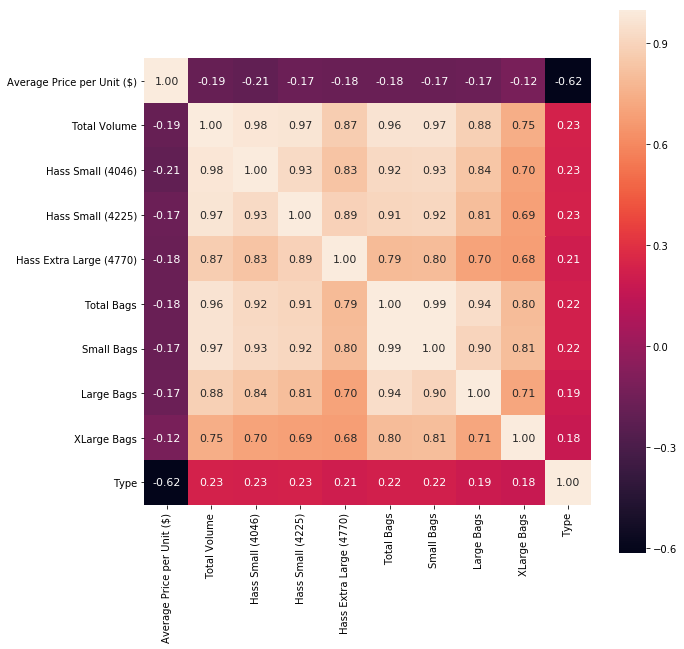

In [11]:
data_corr = data[["Average Price per Unit ($)",
                  "Total Volume",
                  "Hass Small (4046)",
                  "Hass Small (4225)",
                  "Hass Extra Large (4770)",
                  "Total Bags",
                  "Small Bags",
                  "Large Bags",
                  "XLarge Bags",
                  "Type",
                  "Region"]].corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data_corr, cbar = True,  square = True, annot=True,fmt= '.2f',annot_kws={'size': 11})
plt.show()

In [12]:
#cleaned data set
data_corr.head()


,Average Price per Unit ($),Total Volume,Hass Small (4046),Hass Small (4225),Hass Extra Large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type
Average Price per Unit ($),1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,-0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.232434
Hass Small (4046),-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.225819
Hass Small (4225),-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.232289
Hass Extra Large (4770),-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.210027


In [13]:
#create duplicate database
df_sales = data_cleaned_time.copy()
df_sales.head()

#plot data - monthly sales

#represent month in date field as its first day

#df_sales["Date"] = df_sales["Date"].dt.to_period("M")

#df_sales["new"] = df_sales["Date"].dt.to_period("M")

#df_sales['Date'] = pd.to_datetime(df_sales['Date'].to_period("M"))
#groupby date and sum the sales
# df_sales = df_sales.groupby('date').sales.sum().reset_index()

,Average Price per Unit ($),Total Volume,Hass Small (4046),Hass Small (4225),Hass Extra Large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region
Date,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,0,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,0,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,0,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,1,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,0,Boise


In [32]:
a = [1,2,3,4,5]
print(a)
b = a.pop([2:])
print(b)

SyntaxError: invalid syntax (<ipython-input-32-8139deb56faf>, line 3)